# eyedata-permutation-analysis

This script implements a nonparametric statistical test for analyzing eye-tracking data based on the method described by Maris and Oostenveld (2007). The core of this script is based on a MATLAB script written by Kinga Anna Bohus. I implemented it in Python with extra preprocessing and plotting functions. It can be used to compare two groups and determine if there are any significant differences between them. This can be done either with paired or unpaired data and using parametric (t-test) or non-parametric (Wilcoxon) tests.

The script defines a `PermutationTest` class with various methods for data preprocessing, filtering, interpolation, and statistical testing. Given a set of input parameters, it loads the data, preprocesses it, and runs the permutation tests based on the input parameters.

- `eyedata_reformat()` method :reads the input data, extracts relevant information, and groups it by subject and trial.
- `hampel_filter()` method: used for outlier detection and correction using the Hampel filter.
- `filter_and_interpolate()` method applies the Hampel filter and/or linear interpolation to the data if specified.
- `get_clusters()` method: calculates clusters of significant differences between the two groups using the specified test (parametric or non-parametric) and paired or unpaired data.
- `permute_once()` method: creates one permutation of the data, creating new groups for comparison.
- `run_permutation_test()` method: carries out the permutation test by generating multiple permutations, calculating clusters for each permutation, and comparing the original clusters with the permuted data.

# Example use

In [1]:
from IPython.display import display
import numpy as np
import pandas as pd
from permutationTest import PermutationTest

### Set your settings

In [2]:
# Data
exp_name = "Example experiment" # The name of the experiment
datafile_0 = "dummy_data/datafile_group_0.csv" # The path to the data file for group/condition 0
datafile_1 = "dummy_data/datafile_group_1.csv" # The path to the data file for group/condition 1
label_0 = "Condition 0" # The label for group/condition 0
label_1 = "Condition 1" # The label for group/condition 1
eye_variable = 'pupil'  # Eye-tracking variable to analyze
freq = 60  # The sampling frequency of the eye-tracker
sample_range = [-48, 314]  # The start and end points of the sample range

# Filtering
filtering = True
sliding_win_size = freq * 0.5  # The sliding window size for the Hampel filter (e.g. freq*0.5 is 500 ms)
outlier_crit = 2.5  # The outlier criterion (number of standard deviations) for the Hampel filter

# Interpolation
linear_interpolation = True
max_gap = freq * 0.220  # The maximum gap size for linear interpolation

# Analysis
permutations = 1000  # Number of permutations
analysis_range = [0, 314]  # The start and end points of the analysis range
t_test = True # Whether to use the t-test as the test statistic
wilcoxon_test = False # Whether to use the Wilcoxon as the test statistic
tails = 2  # The number of tails for the test (1 or 2)
p_threshold = 0.05 # The p-value threshold for significance
t_threshold = 2.069 # The t-value threshold for significance

### Run the test

In [3]:
example_analysis = PermutationTest(
    exp_name, datafile_0, datafile_1, label_0, label_1, eye_variable, freq,
    sample_range, filtering, sliding_win_size, outlier_crit, linear_interpolation, max_gap,
    permutations, analysis_range, t_test, wilcoxon_test, tails, p_threshold, t_threshold)

Data loaded.
Filtering and/or linear interpolation done.
Permutation analysis with t-tests done.


### Print the results

In [4]:
results = example_analysis.t_test_results

print(f"Clusters: {results['clusters']}")
print(f"Probabilities: {results['probs']}")
print(f"Masses: {results['masses']}")

Clusters: [(78, 82), (99, 144), (146, 184), (199, 213), (262, 267)]
Probabilities: [0.434 0.015 0.023 0.144 0.368]
Masses: [11.40865127663514, 125.78907288914559, 107.81194691799224, 40.789478042848174, 14.9745640840536]


### Plot the results

51 96
98 136


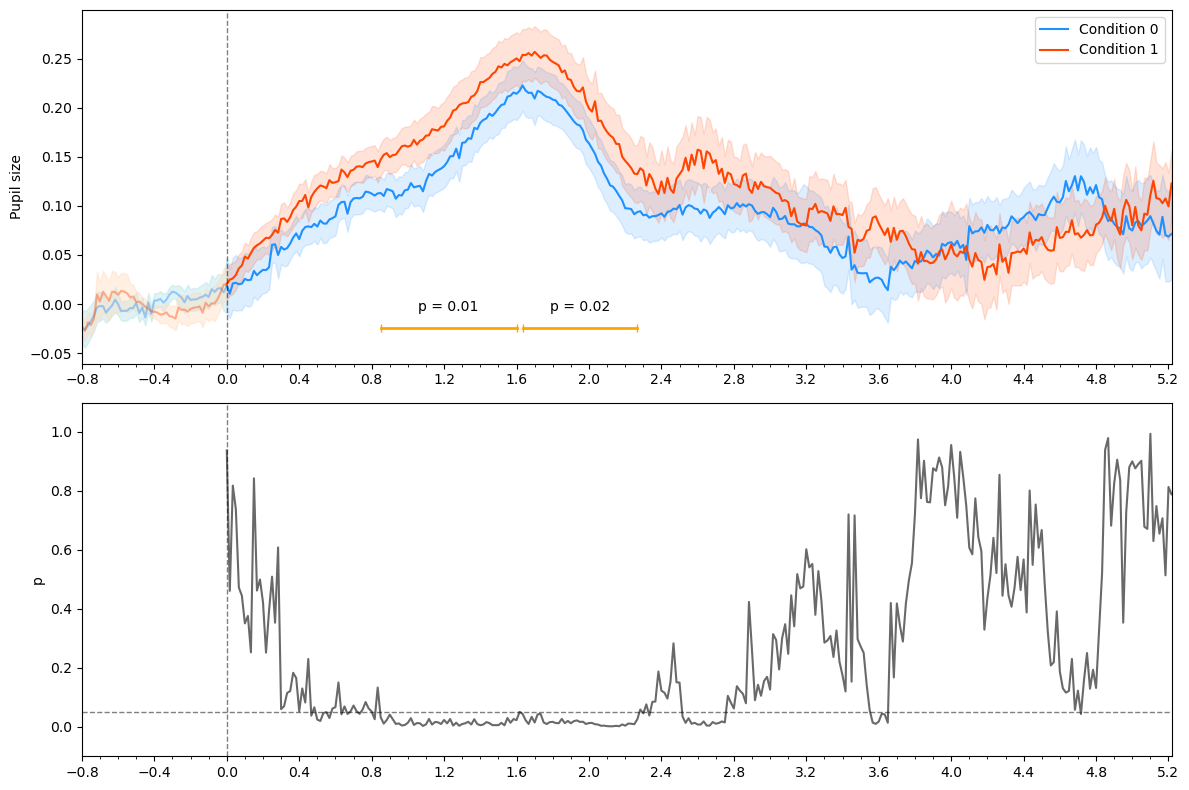

In [5]:
example_analysis.plot_results(results, y_label = 'Pupil size', error_bars = 'SE', baseline_offset = 0)

### Check your original data

Condition 1

In [6]:
for s in range(len(example_analysis.group_0)):
    display(example_analysis.group_0[s][0])

,-48,-47,-46,-45,-44,-43,-42,-41,-40,-39,...,304,305,306,307,308,309,310,311,312,313
1,-0.053625,-0.030625,-0.024625,-0.015625,-0.015625,-0.002625,0.004375,0.004375,0.004375,0.011375,...,-0.097625,-0.113625,-0.103625,-0.090625,-0.068625,-0.052625,-0.061625,-0.051625,-0.058625,-0.037625
3,0.042646,0.124646,0.002646,-0.086354,-0.078354,0.232646,0.455646,0.131646,-0.045354,-0.002354,...,-0.098354,-0.110354,-0.089354,-0.091354,-0.072354,-0.066354,-0.052354,-0.023354,-0.039354,-0.013354
7,-0.002812,-0.009813,0.004188,-0.003812,0.009187,0.007188,0.025188,-0.002812,0.006188,0.000188,...,0.080187,0.091188,0.103188,0.105188,0.093188,0.095187,0.112187,0.109188,0.119188,0.122188
9,0.005958,-0.002042,-0.017042,-0.002042,-0.008042,-0.007042,0.006958,0.006958,0.009958,-0.005042,...,0.000958,0.008958,-0.043042,-0.056042,-0.075042,-0.088042,-0.072042,-0.071042,-0.090042,-0.086042
11,-0.010533,-0.005533,-0.008533,-0.027533,-0.018533,-0.008533,-0.026533,-0.004533,-0.014533,-0.016533,...,-0.034533,-0.044533,-0.038533,-0.031533,0.006467,-0.061533,NaN,NaN,NaN,NaN


,-48,-47,-46,-45,-44,-43,-42,-41,-40,-39,...,304,305,306,307,308,309,310,311,312,313
5,-0.028341,-0.022341,-0.044341,NaN,NaN,NaN,NaN,NaN,-0.012341,0.003659,...,-0.146341,-0.195341,-0.210341,-0.236341,-0.275341,0.093659,-0.144341,-0.315341,-0.350341,-0.362341
7,-0.096289,-0.112289,-0.110289,-0.100289,-0.104289,-0.086289,-0.083289,-0.061289,-0.060289,-0.059289,...,0.128711,0.134711,0.134711,0.133711,0.153711,0.142711,0.159711,0.153711,0.163711,0.162711
9,-0.032083,-0.048083,-0.050083,-0.062083,-0.081083,-0.076083,-0.074083,-0.056083,-0.064083,-0.039083,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.621083,NaN,NaN


,-48,-47,-46,-45,-44,-43,-42,-41,-40,-39,...,304,305,306,307,308,309,310,311,312,313
2,0.066479,0.061479,0.036479,0.042479,0.024479,0.030479,0.023479,0.007479,0.004479,-0.002521,...,-0.018521,-0.013521,-0.025521,-0.013521,-0.013521,-0.016521,-0.017521,-0.011521,-0.016521,-0.007521
4,-0.1255,-0.1275,-0.1445,-0.1095,-0.1125,-0.0785,-0.0705,-0.0685,-0.0555,-0.0565,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-0.000896,-0.003896,-0.006896,0.007104,0.002104,0.001104,0.010104,0.003104,-0.000896,0.002104,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,-0.049771,-0.062771,-0.046771,-0.041771,-0.039771,-0.027771,-0.029771,-0.028771,-0.033771,-0.013771,...,-0.449771,-0.464771,-0.464771,-0.465771,-0.458771,-0.466771,-0.458771,-0.460771,-0.455771,-0.449771
10,0.017063,0.024063,0.034063,0.036062,0.049063,0.032063,0.025063,0.029063,0.026062,0.012063,...,-0.182938,-0.177937,-0.181938,-0.173937,-0.172937,-0.167937,-0.184938,-0.166937,-0.186938,-0.189938
12,-0.11075,-0.09975,-0.10075,-0.09275,-0.09275,-0.07475,-0.07875,-0.07775,-0.05875,-0.05575,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,-48,-47,-46,-45,-44,-43,-42,-41,-40,-39,...,304,305,306,307,308,309,310,311,312,313
1,-0.010563,-0.009562,-0.024563,-0.051562,-0.045562,-0.056563,-0.044562,-0.051562,-0.036562,-0.051562,...,0.414438,0.435437,0.421438,0.403438,0.418438,0.412438,0.414438,0.438437,0.427438,0.440437
3,-0.038964,-0.044964,-0.051964,-0.048964,-0.045964,-0.041964,-0.010964,-0.022964,-0.018964,-0.011964,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.442036
5,-0.036312,-0.040313,-0.031313,-0.026312,-0.024313,-0.035312,-0.028313,0.003687,-0.006313,-0.003312,...,0.058687,0.047688,0.052687,0.055688,0.054688,0.058687,0.060687,0.068687,0.070688,0.076688
7,0.00275,0.01075,0.01175,0.02975,0.02375,0.02675,0.01375,0.02075,0.03575,0.02975,...,NaN,NaN,NaN,NaN,0.35475,0.50175,0.19675,0.18275,0.22575,0.24975
9,-0.054792,-0.067792,-0.067792,-0.065792,-0.056792,-0.072792,-0.073792,-0.081792,-0.074792,-0.084792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,-0.112042,-0.100042,-0.089042,-0.094042,-0.091042,-0.082042,-0.098042,-0.075042,-0.094042,-0.067042,...,0.230958,0.227958,0.234958,0.231958,0.212958,0.219958,0.204958,0.214958,0.201958,0.185958


,-48,-47,-46,-45,-44,-43,-42,-41,-40,-39,...,304,305,306,307,308,309,310,311,312,313
2,-0.285292,-0.301292,-0.287292,-0.295292,-0.280292,-0.279292,-0.279292,-0.278292,-0.263292,-0.258292,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,-0.089571,-0.103571,-0.090571,-0.024571,-0.022571,-0.040571,-0.040571,-0.032571,-0.024571,-0.016571,...,NaN,NaN,0.202429,0.431429,0.260429,0.240429,0.249429,0.245429,0.159429,0.178429
12,-0.010375,-0.012375,-0.016375,0.007625,0.006625,-0.029375,-0.006375,-0.037375,-0.029375,-0.042375,...,-0.082375,-0.083375,-0.068375,-0.076375,-0.080375,-0.078375,-0.078375,-0.079375,-0.070375,-0.076375


,-48,-47,-46,-45,-44,-43,-42,-41,-40,-39,...,304,305,306,307,308,309,310,311,312,313
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.387368,0.385368,0.380368,0.387368,0.386368,0.385368,0.375368,0.405368,0.398368,0.398368
6,-0.044,-0.054,-0.051,-0.049,-0.03,-0.035,-0.03,-0.033,-0.026,-0.017,...,NaN,NaN,NaN,0.086,0.058,0.055,0.051,0.036,0.001,-0.008
10,-0.068521,-0.078521,-0.060521,-0.073521,-0.053521,-0.057521,-0.047521,-0.050521,-0.056521,-0.066521,...,0.033479,0.029479,0.045479,0.043479,0.045479,0.050479,0.062479,0.064479,0.052479,0.058479


,-48,-47,-46,-45,-44,-43,-42,-41,-40,-39,...,304,305,306,307,308,309,310,311,312,313
1,-0.005442,-0.011442,0.002558,0.038558,0.025558,0.042558,0.016558,0.047558,0.061558,0.025558,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.074813,-0.041813,-0.060812,-0.047813,-0.034813,-0.036812,-0.028813,-0.006812,-0.027813,-0.023813,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-0.073854,-0.060854,-0.050854,-0.051854,-0.062854,-0.047854,-0.047854,-0.037854,-0.042854,-0.030854,...,-0.293854,-0.302854,-0.313854,-0.310854,-0.355854,-0.354854,-0.373854,-0.402854,-0.425854,-0.452854
9,-0.043149,-0.031149,-0.043149,-0.037149,-0.039149,-0.028149,-0.023149,-0.026149,-0.035149,-0.029149,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,-0.063667,-0.063667,-0.060667,-0.046667,-0.052667,-0.051667,-0.034667,-0.042667,-0.033667,-0.021667,...,0.053333,0.057333,0.059333,0.063333,0.040333,0.044333,0.027333,0.046333,0.044333,0.007333


,-48,-47,-46,-45,-44,-43,-42,-41,-40,-39,...,304,305,306,307,308,309,310,311,312,313
1,-0.034583,-0.046583,-0.049583,-0.030583,-0.053583,-0.055583,-0.045583,-0.049583,-0.061583,-0.047583,...,-0.045583,-0.056583,-0.051583,-0.054583,-0.056583,-0.058583,-0.043583,-0.047583,-0.050583,-0.052583
3,-0.283978,-0.372978,-0.314978,-0.345978,NaN,NaN,0.279022,0.046022,-0.267978,-0.259978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-0.051542,-0.044542,-0.049542,-0.076542,-0.090542,-0.090542,-0.091542,-0.077542,-0.064542,-0.074542,...,0.100458,0.095458,0.115458,0.096458,0.112458,0.094458,0.095458,0.090458,0.083458,0.087458
7,-0.085,-0.058,-0.026,-0.012,-0.016,-0.014,-0.004,0.01,0.04,0.026,...,0.075,0.067,0.075,0.078,0.082,0.09,0.093,0.107,0.106,0.132
9,0.130312,0.057313,0.030312,0.103313,0.057313,0.064312,0.063312,0.045312,0.069312,0.062312,...,0.193312,0.215312,0.200313,0.229313,0.235313,0.258313,0.240313,0.263313,0.267313,0.281313
11,0.303468,0.242468,0.242468,0.310468,0.267468,0.255468,0.232468,0.245468,0.248468,0.248468,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.300532,NaN,NaN


,-48,-47,-46,-45,-44,-43,-42,-41,-40,-39,...,304,305,306,307,308,309,310,311,312,313
1,0.029848,-0.420152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.156152,-0.131152,-0.094152,-0.089152,-0.068152,-0.059152,-0.039152,-0.039152,-0.052152,-0.029152
3,NaN,0.006348,0.000348,-0.008652,0.021348,0.202348,0.175348,0.057348,0.011348,0.186348,...,0.041348,0.067348,0.076348,0.051348,0.068348,0.075348,0.053348,0.066348,0.064348,0.052348
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.112324,0.145324,0.148324,0.164324,0.162324,0.158324,0.165324,0.154324,0.176324,0.175324
7,-0.096771,-0.082771,-0.065771,-0.085771,-0.044771,-0.033771,-0.012771,0.016229,-0.029771,0.008229,...,-0.216771,-0.280771,-0.233771,-0.217771,NaN,-0.159771,NaN,NaN,NaN,NaN


,-48,-47,-46,-45,-44,-43,-42,-41,-40,-39,...,304,305,306,307,308,309,310,311,312,313
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.6244,0.6314,0.6244,0.6354,0.6494,0.6374,0.6574,0.6554,0.6664,0.6734
4,0.313896,0.319896,0.323896,0.303896,0.267896,0.242896,0.214896,0.157896,0.109896,0.071896,...,-0.252104,-0.248104,-0.265104,-0.253104,-0.266104,-0.248104,-0.247104,-0.230104,-0.223104,-0.209104


,-48,-47,-46,-45,-44,-43,-42,-41,-40,-39,...,304,305,306,307,308,309,310,311,312,313
4,NaN,NaN,NaN,NaN,0.264929,0.151929,0.164929,0.183929,0.200929,0.194929,...,0.275929,0.268929,0.289929,0.301929,0.298929,0.325929,0.311929,0.269929,0.280929,0.280929
6,-0.004417,0.018583,0.031583,0.047583,0.055583,0.066583,0.080583,0.102583,0.106583,0.122583,...,0.262583,0.261583,0.248583,0.247583,0.239583,0.258583,0.260583,0.265583,0.267583,0.240583
10,0.100321,0.102321,0.129321,0.130321,0.143321,0.147321,0.152321,0.181321,0.143321,0.138321,...,0.207321,0.201321,0.154321,0.138321,0.071321,0.050321,0.030321,-0.005679,-0.013679,-0.039679
12,-0.061,-0.083,-0.11,-0.119,-0.118,-0.124,-0.135,-0.129,-0.132,-0.118,...,0.384,0.376,0.378,0.374,0.402,NaN,0.399,0.403,0.448,0.404


,-48,-47,-46,-45,-44,-43,-42,-41,-40,-39,...,304,305,306,307,308,309,310,311,312,313
1,-0.128167,-0.124167,-0.130167,-0.109167,-0.118167,-0.115167,-0.113167,-0.119167,-0.091167,-0.088167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.140229,-0.135229,-0.145229,-0.132229,-0.120229,-0.113229,-0.101229,-0.108229,-0.108229,-0.102229,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-0.152604,-0.143604,-0.122604,-0.114604,-0.106604,-0.109604,-0.084604,-0.096604,-0.091604,-0.080604,...,0.333396,0.349396,0.350396,0.335396,0.348396,0.318396,0.360396,NaN,NaN,NaN


,-48,-47,-46,-45,-44,-43,-42,-41,-40,-39,...,304,305,306,307,308,309,310,311,312,313
1,-0.025054,-0.015054,0.002946,0.006946,-0.009054,0.001946,-0.011054,0.014946,-0.007054,0.002946,...,0.216946,0.216946,0.218946,0.221946,0.210946,0.220946,0.230946,0.219946,0.227946,0.247946
3,-0.067583,-0.043583,-0.036583,-0.030583,-0.041583,-0.044583,-0.045583,-0.028583,-0.042583,-0.024583,...,-0.072583,-0.068583,-0.036583,-0.042583,-0.020583,-0.012583,-0.021583,0.014417,-0.013583,-0.004583
5,-0.04875,-0.04975,-0.04875,-0.06475,-0.04075,-0.03775,-0.05075,-0.05475,-0.03775,-0.03475,...,0.03525,0.04325,0.04925,0.06225,0.07525,0.07325,0.08125,0.09025,0.08025,0.09525
11,-0.019512,0.002488,-0.005512,0.021488,0.007488,0.019488,0.012488,0.013488,0.011488,0.012488,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.573488,0.470488,0.623488


,-48,-47,-46,-45,-44,-43,-42,-41,-40,-39,...,304,305,306,307,308,309,310,311,312,313
2,-0.070625,-0.050625,-0.054625,-0.048625,-0.048625,-0.036625,-0.030625,-0.021625,-0.032625,-0.018625,...,-0.039625,-0.044625,-0.057625,-0.043625,-0.058625,-0.051625,-0.066625,-0.053625,-0.059625,-0.063625
4,-0.092867,-0.082867,-0.083867,-0.074867,-0.045867,-0.039867,-0.037867,-0.028867,-0.024867,-0.016867,...,0.078133,0.064133,0.070133,0.066133,0.058133,0.066133,0.066133,0.059133,0.070133,0.047133
6,0.025063,0.036062,0.042063,0.051062,0.050063,0.053062,0.067062,0.074063,0.076063,0.072063,...,-0.052937,-0.041938,-0.046938,-0.044937,-0.038937,-0.044937,-0.041938,-0.027938,-0.029937,-0.028938
8,-0.106896,-0.097896,-0.110896,-0.111896,-0.093896,-0.084896,-0.074896,-0.071896,-0.065896,-0.054896,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,-0.099083,-0.095083,-0.093083,-0.077083,-0.069083,-0.073083,-0.074083,-0.077083,-0.059083,-0.059083,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,-0.068,-0.066,-0.048,-0.06,-0.053,-0.06,-0.032,-0.031,-0.03,-0.02,...,0.328,0.291,0.226,0.367,0.186,0.343,0.364,0.32,0.206,0.074


,-48,-47,-46,-45,-44,-43,-42,-41,-40,-39,...,304,305,306,307,308,309,310,311,312,313
3,-0.0485,-0.0295,-0.0345,-0.0355,-0.0045,-0.0305,0.0065,0.0025,-0.0175,0.0015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.01683,-0.01017,-0.00817,NaN,-0.00917,-0.01317,-0.01517,0.00183,-0.00617,0.00283,...,-0.61617,-0.62317,-0.63117,-0.62517,-0.62217,-0.61317,-0.61917,-0.62317,-0.61417,-0.60417
7,0.017884,0.021884,0.036884,0.043884,0.041884,0.046884,0.050884,0.054884,0.055884,0.068884,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.006646,0.017646,0.021646,0.027646,0.035646,0.041646,0.048646,0.048646,0.059646,0.071646,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,-0.029583,-0.015583,-0.015583,-0.003583,-0.011583,0.015417,0.000417,-0.018583,0.006417,-0.007583,...,-0.270583,-0.263583,-0.260583,-0.263583,-0.254583,-0.231583,-0.252583,-0.247583,-0.248583,-0.243583


,-48,-47,-46,-45,-44,-43,-42,-41,-40,-39,...,304,305,306,307,308,309,310,311,312,313
2,-0.035375,-0.032375,-0.026375,-0.025375,-0.025375,-0.024375,-0.011375,-0.011375,-0.011375,-0.012375,...,0.125625,0.127625,0.149625,0.133625,0.139625,0.142625,0.134625,0.154625,0.149625,0.151625
4,-0.026562,-0.024563,-0.021562,-0.022562,-0.022562,-0.024563,-0.019563,-0.006562,-0.010563,-0.015562,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.110458,0.095458,0.098458,0.098458,0.095458,0.116458,0.092458,0.084458,0.095458,0.096458,...,0.456458,0.444458,0.442458,0.439458,0.419458,0.398458,0.397458,0.379458,0.347458,0.315458
10,0.148229,0.207229,0.139229,0.200229,0.232229,0.312229,0.193229,0.236229,0.180229,0.238229,...,0.026229,0.006229,-0.002771,-0.029771,-0.038771,-0.053771,-0.063771,-0.067771,-0.089771,-0.097771


,-48,-47,-46,-45,-44,-43,-42,-41,-40,-39,...,304,305,306,307,308,309,310,311,312,313
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.191172,0.194172,0.186172,0.198172,0.192172,0.188172,0.180172,0.183172,0.186172,0.183172
7,NaN,0.011426,-0.050574,-0.071574,-0.082574,-0.081574,-0.092574,-0.076574,-0.075574,-0.068574,...,0.120426,0.118426,0.118426,0.119426,0.125426,0.107426,0.131426,0.143426,0.111426,0.128426
9,-0.072737,-0.063737,-0.061737,-0.041737,-0.053737,-0.049737,-0.036737,-0.038737,-0.035737,-0.019737,...,0.003263,0.006263,0.022263,0.027263,0.027263,0.030263,0.041263,0.045263,0.032263,0.047263


,-48,-47,-46,-45,-44,-43,-42,-41,-40,-39,...,304,305,306,307,308,309,310,311,312,313
1,-0.06475,-0.05675,-0.06375,-0.06075,-0.05575,-0.03375,-0.04075,-0.05375,-0.04075,-0.03775,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-0.133937,-0.138937,-0.145937,-0.137937,-0.140937,-0.125938,-0.115937,-0.111937,-0.088938,-0.088938,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,-0.040083,-0.017083,-0.033083,-0.033083,-0.010083,0.001917,-0.007083,0.017917,-0.027083,-0.049083,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,-0.050104,-0.064104,-0.053104,-0.048104,-0.041104,-0.020104,-0.043104,-0.037104,-0.012104,-0.015104,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,-48,-47,-46,-45,-44,-43,-42,-41,-40,-39,...,304,305,306,307,308,309,310,311,312,313
2,-0.058878,-0.058878,-0.044878,-0.018878,-0.018878,-0.018878,0.000122,0.006122,0.019122,0.017122,...,0.334122,0.319122,0.295122,0.346122,0.350122,0.313122,0.314122,0.321122,0.306122,0.308122
4,-0.012646,-0.017646,-0.005646,-0.013646,-0.016646,-0.027646,-0.037646,-0.011646,-0.031646,-0.028646,...,NaN,NaN,NaN,-0.169646,-0.056646,-0.018646,-0.053646,-0.053646,-0.067646,-0.069646
6,0.002583,-0.008417,0.013583,0.006583,0.011583,0.017583,0.024583,0.037583,0.038583,0.006583,...,0.547583,0.549583,0.541583,NaN,NaN,NaN,NaN,0.567583,0.568583,0.575583
8,-0.015087,-0.022087,-0.007087,-0.000087,0.029913,0.003913,0.005913,0.026913,0.016913,0.015913,...,0.087913,NaN,NaN,0.070913,NaN,0.102913,0.119913,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.335667,NaN,NaN,...,-0.062333,-0.064333,-0.075333,-0.066333,-0.061333,-0.066333,-0.056333,-0.044333,-0.044333,-0.036333


,-48,-47,-46,-45,-44,-43,-42,-41,-40,-39,...,304,305,306,307,308,309,310,311,312,313
2,-0.103417,-0.100417,-0.095417,-0.088417,-0.078417,-0.070417,-0.060417,-0.069417,-0.053417,-0.048417,...,0.085583,0.083583,0.076583,0.081583,0.080583,0.101583,0.094583,0.106583,0.100583,0.090583
4,0.0982,-0.0108,0.0122,-0.0158,0.0482,0.0112,0.1472,0.0562,0.1622,NaN,...,-0.2028,-0.2258,-0.1118,-0.2488,-0.2748,-0.1768,-0.3598,-0.3788,-0.4068,-0.4118
6,-0.096604,-0.084604,-0.062604,-0.042604,-0.008604,-0.161604,-0.086604,0.016396,-0.034604,-0.008604,...,0.016396,-0.021604,0.063396,-0.022604,-0.060604,0.069396,0.199396,-0.123604,NaN,-0.296604
8,0.153773,0.129773,NaN,0.095773,-0.026227,0.250773,NaN,0.173773,0.200773,0.032773,...,NaN,NaN,NaN,-0.111227,-0.117227,-0.069227,0.014773,0.129773,NaN,-0.040227
10,-0.041521,-0.024521,0.026479,0.051479,-0.077521,-0.092521,-0.021521,0.028479,0.015479,0.144479,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,-0.167689,-0.093689,-0.137689,-0.007689,-0.036689,0.057311,-0.127689,-0.093689,NaN,-0.094689,...,-0.103689,-0.078689,-0.099689,-0.128689,-0.038689,-0.055689,-0.119689,NaN,-0.208689,-0.130689


,-48,-47,-46,-45,-44,-43,-42,-41,-40,-39,...,304,305,306,307,308,309,310,311,312,313
2,-0.114646,-0.109646,-0.114646,-0.089646,-0.094646,-0.088646,-0.098646,-0.083646,-0.073646,-0.072646,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.126875,-0.114875,-0.120875,-0.123875,-0.106875,-0.095875,-0.083875,-0.078875,-0.052875,-0.011875,...,0.036125,0.026125,0.030125,0.044125,-0.068875,-0.368875,NaN,NaN,NaN,NaN
6,0.121708,0.098708,0.115708,0.114708,0.131708,0.111708,0.115708,0.081708,0.110708,0.126708,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.106143,0.111143,0.106143,0.117143,0.120143,0.125143,0.120143,0.133143,0.124143,0.128143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,-48,-47,-46,-45,-44,-43,-42,-41,-40,-39,...,304,305,306,307,308,309,310,311,312,313
2,-0.122146,-0.118146,-0.120146,-0.089146,-0.098146,-0.090146,-0.085146,-0.088146,-0.069146,-0.065146,...,0.433854,0.443854,0.448854,0.451854,0.448854,0.457854,0.473854,0.459854,0.470854,0.469854
4,-0.084333,-0.076333,-0.063333,-0.067333,-0.063333,-0.060333,-0.058333,-0.056333,-0.065333,-0.056333,...,0.471667,0.472667,0.481667,0.462667,NaN,NaN,NaN,0.517667,NaN,0.483667
12,-0.163833,-0.158833,-0.156833,-0.158833,-0.132833,-0.125833,-0.111833,-0.097833,-0.083833,-0.094833,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,-48,-47,-46,-45,-44,-43,-42,-41,-40,-39,...,304,305,306,307,308,309,310,311,312,313
2,-0.047563,-0.054562,-0.049563,-0.039563,-0.036562,-0.047563,-0.042563,-0.036562,-0.055563,-0.059562,...,-0.175563,-0.193562,-0.211562,-0.213562,-0.232563,-0.236563,-0.245562,-0.250563,-0.269562,-0.274562
4,0.055333,0.042333,0.057333,0.026333,0.033333,0.022333,0.026333,0.031333,0.037333,0.044333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.133767,0.138767,0.106767,0.100767,0.087767,0.104767,0.068767,0.052767,0.047767,0.013767,...,0.182767,0.171767,0.184767,0.174767,0.159767,0.143767,0.158767,0.141767,0.147767,0.135767
10,0.103517,0.077517,0.080517,0.090517,0.062517,0.077517,0.044517,0.034517,0.025517,0.022517,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,-48,-47,-46,-45,-44,-43,-42,-41,-40,-39,...,304,305,306,307,308,309,310,311,312,313
1,0.075646,0.097646,0.091646,0.109646,0.104646,0.123646,0.098646,0.087646,0.086646,0.110646,...,0.616646,0.616646,0.635646,0.637646,0.624646,0.625646,0.630646,0.626646,0.622646,0.627646
3,-0.075771,-0.075771,-0.072771,-0.077771,-0.072771,-0.068771,-0.064771,-0.074771,-0.072771,-0.062771,...,0.234229,NaN,0.230229,0.238229,0.222229,0.227229,0.225229,0.216229,0.228229,0.214229
5,-0.017396,-0.007396,-0.004396,0.005604,0.010604,0.005604,0.005604,0.026604,0.017604,0.036604,...,0.351604,0.353604,0.355604,0.363604,0.365604,NaN,NaN,NaN,NaN,NaN
7,-0.002261,0.008739,NaN,0.012739,0.010739,-0.000261,-0.001261,-0.001261,0.004739,0.001739,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.034333,0.019333,0.029333,0.017333,0.012333,0.010333,-0.000667,-0.003667,-0.011667,-0.002667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,-0.034354,-0.029354,-0.027354,-0.042354,-0.037354,-0.034354,-0.025354,-0.036354,-0.029354,-0.042354,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Condition 2

In [7]:
for s in range(len(example_analysis.group_1)):
    display(example_analysis.group_1[s][0])

,-48,-47,-46,-45,-44,-43,-42,-41,-40,-39,...,304,305,306,307,308,309,310,311,312,313
2,0.072333,0.001333,-0.032667,-0.019667,-0.023667,-0.066667,-0.004667,0.028333,-0.024667,-0.069667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.005638,NaN,-0.032362,-0.017362,-0.038362,-0.034362,-0.000362,-0.025362,-0.080362,-0.033362,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-0.037896,-0.028896,-0.036896,-0.026896,-0.008896,-0.023896,-0.014896,-0.023896,0.009104,-0.007896,...,0.021104,0.046104,0.040104,0.057104,0.037104,0.067104,0.062104,0.025104,0.058104,0.055104
8,-0.035296,0.016704,0.012704,0.103704,0.000704,0.059704,-0.019296,-0.012296,0.118704,0.153704,...,0.050704,0.053704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,-0.056021,-0.058021,-0.068021,-0.049021,-0.038021,-0.037021,-0.033021,-0.031021,-0.043021,-0.033021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,0.059788,0.044788,0.023788,0.006788,-0.021212,-0.037212,-0.050212,-0.062212,-0.077212,-0.081212,...,0.239788,0.398788,0.269788,0.516788,NaN,NaN,NaN,NaN,NaN,NaN


,-48,-47,-46,-45,-44,-43,-42,-41,-40,-39,...,304,305,306,307,308,309,310,311,312,313
2,-0.053931,-0.048931,-0.053931,-0.048931,-0.019931,-0.034931,-0.051931,-0.040931,-0.001931,-0.022931,...,0.031069,0.019069,0.039069,0.034069,0.046069,0.066069,0.077069,0.059069,0.093069,0.100069
4,-0.002167,0.002833,0.017833,0.018833,0.019833,0.040833,0.038833,0.037833,0.048833,0.050833,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-0.011182,-0.004182,-0.007182,-0.005182,-0.004182,-0.014182,-0.016182,-0.012182,-0.003182,-0.014182,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.031757,NaN,NaN,0.031757,0.041757,0.029757,0.038757,0.027757,0.023757,NaN,...,-0.076243,-0.086243,-0.085243,-0.081243,-0.096243,-0.080243,-0.098243,-0.100243,-0.098243,-0.103243
10,-0.015021,-0.013021,-0.023021,0.015979,0.031979,0.029979,0.030979,0.041979,0.041979,0.049979,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,-48,-47,-46,-45,-44,-43,-42,-41,-40,-39,...,304,305,306,307,308,309,310,311,312,313
1,-0.131292,-0.114292,-0.123292,-0.115292,-0.101292,-0.103292,-0.099292,-0.082292,-0.081292,-0.062292,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.088333,-0.076333,-0.092333,-0.064333,-0.068333,-0.064333,-0.044333,-0.039333,-0.042333,-0.030333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-0.003304,-0.009304,0.008696,0.000696,0.008696,0.021696,0.015696,0.028696,0.021696,0.044696,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,-0.048375,-0.057375,-0.060375,-0.057375,-0.046375,-0.055375,-0.045375,-0.058375,-0.047375,-0.057375,...,0.094625,0.114625,0.109625,0.103625,0.119625,0.119625,0.110625,0.118625,0.122625,0.140625
9,-0.028079,-0.027079,-0.012079,-0.003079,-0.016079,0.002921,0.009921,0.013921,0.019921,0.025921,...,-0.246079,-0.254079,-0.283079,-0.291079,-0.321079,-0.336079,-0.373079,-0.397079,-0.412079,-0.435079
11,-0.095562,-0.094562,-0.086563,-0.078562,-0.067562,-0.065562,-0.060562,-0.055563,-0.052562,-0.040563,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,-48,-47,-46,-45,-44,-43,-42,-41,-40,-39,...,304,305,306,307,308,309,310,311,312,313
2,-0.124537,-0.111537,-0.116537,-0.111537,-0.080537,-0.059537,-0.040537,-0.028537,-0.008537,-0.029537,...,0.229463,0.245463,0.237463,0.248463,0.262463,0.255463,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,-0.024333,-0.043333,-0.038333,-0.029333,...,0.163667,0.166667,0.197667,0.173667,0.189667,0.174667,0.183667,0.183667,0.175667,0.192667
6,0.005081,-0.012919,0.006081,0.013081,-0.004919,0.012081,0.012081,0.007081,0.023081,0.023081,...,0.204081,0.197081,0.204081,0.226081,0.230081,0.214081,0.217081,0.231081,0.235081,0.245081
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.221317,-0.088683,-0.127683,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.436317,0.685317
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,-0.064229,-0.053229,-0.062229,-0.050229,-0.073229,-0.055229,-0.069229,-0.053229,-0.064229,-0.052229,...,0.096771,0.091771,0.089771,0.069771,0.059771,0.048771,0.032771,0.016771,-0.003229,-0.015229


,-48,-47,-46,-45,-44,-43,-42,-41,-40,-39,...,304,305,306,307,308,309,310,311,312,313
3,0.054413,0.062413,0.061413,0.037413,0.162413,0.085413,NaN,0.120413,0.014413,0.140413,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,-0.072,-0.08,-0.074,-0.079,-0.08,-0.064,-0.062,-0.065,-0.057,-0.063,...,0.082,0.084,0.088,0.101,0.038,0.031,0.02,NaN,NaN,NaN
9,-0.085783,-0.087783,-0.094783,-0.081783,-0.079783,-0.070783,-0.065783,-0.074783,-0.032783,-0.062783,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,-48,-47,-46,-45,-44,-43,-42,-41,-40,-39,...,304,305,306,307,308,309,310,311,312,313
1,-0.013875,0.001125,0.002125,0.011125,0.018125,0.032125,0.021125,0.039125,0.015125,0.032125,...,0.346125,0.354125,0.356125,0.365125,0.357125,0.359125,0.361125,0.365125,0.367125,0.374125
3,-0.086479,-0.080479,-0.081479,-0.078479,-0.061479,-0.084479,-0.067479,-0.062479,-0.062479,-0.064479,...,0.247521,0.241521,0.226521,0.223521,0.203521,0.180521,0.168521,0.140521,0.114521,0.078521
7,0.130188,0.131188,0.119188,0.110187,0.096187,0.099187,0.091188,0.086188,0.063187,0.058188,...,0.199187,0.186188,0.194188,0.163188,0.149188,0.128188,0.132188,0.106188,0.104188,0.091188
9,0.081667,0.062667,0.077667,0.063667,0.046667,0.041667,0.026667,0.027667,0.005667,-0.008333,...,0.189667,0.195667,0.202667,0.197667,0.209667,0.198667,0.194667,0.200667,0.198667,0.193667


,-48,-47,-46,-45,-44,-43,-42,-41,-40,-39,...,304,305,306,307,308,309,310,311,312,313
2,-0.069915,-0.082915,-0.066915,-0.060915,-0.072915,-0.032915,-0.071915,-0.060915,-0.047915,-0.048915,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.105125,-0.117125,-0.096125,-0.083125,-0.102125,-0.085125,-0.080125,-0.104125,-0.087125,-0.075125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-0.077042,-0.076042,-0.072042,-0.070042,-0.054042,-0.054042,-0.053042,-0.046042,-0.046042,-0.043042,...,-0.141042,-0.127042,-0.130042,-0.141042,-0.136042,-0.146042,-0.142042,-0.149042,-0.161042,-0.160042
8,-0.045625,-0.038625,-0.026625,-0.032625,-0.045625,-0.026625,-0.023625,-0.020625,-0.021625,-0.004625,...,0.333375,0.346375,0.344375,0.343375,0.338375,0.347375,0.345375,0.353375,NaN,0.322375
12,-0.090396,-0.094396,-0.075396,-0.086396,-0.074396,-0.079396,-0.070396,-0.054396,-0.051396,-0.054396,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,-48,-47,-46,-45,-44,-43,-42,-41,-40,-39,...,304,305,306,307,308,309,310,311,312,313
2,-0.067729,-0.070729,-0.075729,-0.082729,-0.075729,-0.075729,-0.073729,-0.072729,-0.056729,-0.076729,...,-0.031729,-0.039729,-0.044729,-0.029729,-0.024729,-0.037729,-0.041729,-0.038729,-0.033729,-0.019729
4,-0.0835,-0.0735,-0.0805,-0.0805,-0.0805,-0.0765,-0.0675,-0.0605,-0.0665,-0.0465,...,0.0655,0.0755,0.0905,0.1015,0.1045,0.1245,0.1195,0.1295,0.1385,0.1395
6,-0.164256,-0.175256,-0.151256,-0.132256,-0.129256,-0.148256,-0.142256,-0.139256,-0.122256,-0.114256,...,-0.096256,-0.088256,-0.093256,-0.074256,-0.058256,-0.045256,-0.034256,-0.038256,-0.017256,-0.012256
12,0.12004,0.06404,0.14004,-0.04896,-0.04196,0.06404,0.05204,0.02004,0.01204,0.04804,...,-0.01796,NaN,0.06804,-0.06296,-0.03096,-0.04496,-0.02596,-0.01696,-0.01596,-0.00996


,-48,-47,-46,-45,-44,-43,-42,-41,-40,-39,...,304,305,306,307,308,309,310,311,312,313
2,-0.036,-0.049,-0.052,-0.008,-0.006,-0.016,-0.051,-0.013,0.01,-0.03,...,0.108,0.09,0.088,0.109,0.117,0.103,0.098,0.117,0.112,0.115
4,NaN,NaN,0.170286,0.173286,0.120286,0.098286,0.107286,0.190286,0.162286,0.111286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.239128,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,-48,-47,-46,-45,-44,-43,-42,-41,-40,-39,...,304,305,306,307,308,309,310,311,312,313
1,NaN,NaN,NaN,NaN,NaN,0.50607,0.41507,0.47707,0.42607,0.45807,...,0.22807,0.23207,0.25607,0.25807,0.26707,0.28307,0.28307,0.29707,0.31907,0.32007


,-48,-47,-46,-45,-44,-43,-42,-41,-40,-39,...,304,305,306,307,308,309,310,311,312,313
1,0.223103,0.223103,0.213103,0.188103,0.163103,0.133103,0.101103,0.057103,0.007103,0.010103,...,0.409103,0.413103,0.422103,0.409103,0.410103,0.398103,0.394103,0.364103,0.343103,0.313103
3,-0.140529,-0.135529,-0.137529,-0.141529,-0.126529,-0.142529,-0.133529,-0.137529,-0.136529,-0.143529,...,NaN,0.140471,0.119471,0.123471,0.090471,0.064471,0.047471,0.039471,0.027471,0.009471
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.024641,...,0.210641,0.179641,0.168641,0.149641,0.125641,0.108641,0.096641,0.083641,0.075641,0.064641
11,-0.044792,-0.050792,-0.066792,-0.077792,-0.108792,-0.110792,-0.113792,-0.112792,-0.132792,-0.112792,...,0.088208,0.108208,0.140208,0.165208,0.140208,0.159208,0.165208,0.175208,0.182208,0.185208


,-48,-47,-46,-45,-44,-43,-42,-41,-40,-39,...,304,305,306,307,308,309,310,311,312,313
2,-0.195292,-0.177292,-0.161292,-0.159292,-0.146292,-0.126292,-0.123292,-0.120292,-0.106292,-0.108292,...,-0.309292,-0.316292,-0.325292,-0.275292,-0.229292,-0.239292,-0.249292,-0.231292,-0.222292,-0.225292
6,0.357354,0.317354,0.338354,0.311354,0.284354,0.254354,0.245354,0.233354,0.210354,0.180354,...,0.105354,0.082354,0.049354,0.030354,0.022354,-0.026646,-0.049646,-0.071646,-0.088646,-0.113646
8,-0.166229,-0.150229,-0.141229,-0.116229,-0.112229,-0.094229,-0.097229,-0.075229,-0.068229,-0.081229,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,0.168658,-0.032342,0.162658,0.191658,0.181658,0.348658,0.333658,NaN,NaN,-0.023342,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,-48,-47,-46,-45,-44,-43,-42,-41,-40,-39,...,304,305,306,307,308,309,310,311,312,313
4,-0.049979,-0.042979,-0.036979,-0.030979,-0.044979,-0.025979,-0.018979,-0.016979,-0.041979,-0.038979,...,0.095021,0.114021,0.133021,0.120021,0.134021,0.146021,0.117021,0.120021,0.114021,0.106021
6,0.021063,-0.044937,-0.029937,0.018062,0.021063,-0.037937,-0.046938,0.198063,0.145063,-0.037937,...,-0.136937,-0.135937,-0.131938,-0.147937,0.203063,0.181062,-0.114937,0.259062,-0.172937,-0.146937
8,0.001646,0.006646,-0.008354,-0.016354,0.009646,-0.003354,-0.002354,0.000646,-0.004354,-0.006354,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,0.063042,0.060042,0.066042,0.055042,0.051042,0.049042,0.045042,0.045042,0.042042,0.042042,...,0.062042,0.082042,0.091042,0.087042,0.100042,0.096042,0.105042,0.108042,0.105042,0.119042


,-48,-47,-46,-45,-44,-43,-42,-41,-40,-39,...,304,305,306,307,308,309,310,311,312,313
1,-0.114,-0.096,-0.093,-0.087,-0.081,-0.074,-0.072,-0.069,-0.044,-0.061,...,0.012,0.017,0.021,0.025,0.004,0.017,0.038,0.026,0.022,0.034
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.220125,0.211125,0.207125,0.196125,0.202125,0.205125,0.211125,0.200125,0.200125,0.199125
5,-0.080937,-0.070938,-0.066937,-0.068937,-0.060937,-0.049938,-0.053937,-0.027938,-0.034938,-0.031938,...,-0.041938,-0.497937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,-0.112729,-0.102729,-0.097729,-0.087729,-0.087729,-0.070729,-0.062729,-0.059729,-0.039729,-0.034729,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,-48,-47,-46,-45,-44,-43,-42,-41,-40,-39,...,304,305,306,307,308,309,310,311,312,313
2,-0.039587,-0.021587,-0.027587,-0.021587,-0.018587,0.003413,0.014413,0.018413,-0.013587,-0.014587,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.060021,-0.035021,-0.030021,-0.049021,-0.020021,-0.012021,-0.013021,-0.008021,0.006979,-0.001021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-0.063531,-0.062531,-0.061531,-0.028531,-0.028531,-0.016531,-0.005531,-0.028531,-0.011531,-0.004531,...,-0.331531,-0.321531,-0.321531,-0.312531,-0.319531,-0.308531,-0.278531,-0.275531,NaN,NaN
8,-0.042513,-0.044513,-0.023513,-0.039513,-0.019513,-0.026513,-0.003513,0.004487,-0.009513,-0.007513,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,0.145063,0.148063,0.155062,0.146063,0.159062,0.159062,0.162062,0.152062,0.124063,0.126062,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,-48,-47,-46,-45,-44,-43,-42,-41,-40,-39,...,304,305,306,307,308,309,310,311,312,313
1,-0.054354,-0.088354,-0.073354,-0.066354,-0.063354,-0.051354,-0.042354,-0.044354,-0.048354,-0.047354,...,0.422646,0.425646,0.437646,0.443646,0.458646,0.469646,0.465646,0.469646,0.483646,0.495646
3,0.064935,0.066935,0.069935,0.060935,0.075935,0.062935,0.070935,0.085935,0.082935,0.073935,...,-0.094065,-0.089065,-0.106065,-0.121065,-0.110065,-0.123065,-0.126065,-0.114065,-0.118065,-0.115065
5,0.068042,0.054042,0.051042,0.060042,0.042042,0.065042,0.047042,0.040042,0.035042,0.022042,...,0.096042,0.123042,0.143042,0.158042,0.183042,0.192042,0.207042,0.222042,0.239042,0.254042
7,0.163417,0.187417,0.151417,0.140417,0.227417,0.158417,0.133417,0.141417,0.136417,0.122417,...,0.011417,0.019417,0.082417,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.074404,-0.089596,-0.038596,-0.022596,-0.053596,0.016404,-0.080596,-0.012596,-0.017596,-0.064596,...,0.090404,0.203404,0.185404,0.010404,-0.022596,-0.044596,-0.096596,-0.131596,-0.170596,-0.202596


,-48,-47,-46,-45,-44,-43,-42,-41,-40,-39,...,304,305,306,307,308,309,310,311,312,313
2,0.034604,0.038604,-0.014396,-0.029396,-0.022396,-0.035396,-0.035396,-0.028396,-0.038396,-0.041396,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,-0.078146,-0.093146,-0.074146,-0.076146,-0.076146,-0.079146,-0.068146,-0.077146,-0.076146,-0.059146,...,0.158854,0.163854,0.163854,0.166854,0.160854,0.157854,0.185854,0.178854,0.173854,0.172854
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0275,...,0.0155,0.0125,0.0275,0.0845,0.0715,0.0165,0.0125,0.0255,0.0335,0.0105
12,0.038875,0.041875,0.079875,0.075875,0.066875,0.056875,0.074875,0.074875,0.084875,0.082875,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,-48,-47,-46,-45,-44,-43,-42,-41,-40,-39,...,304,305,306,307,308,309,310,311,312,313
2,-0.130521,-0.113521,-0.107521,-0.083521,-0.060521,-0.057521,-0.052521,-0.036521,-0.037521,-0.031521,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.166333,-0.173333,-0.198333,-0.188333,-0.210333,-0.221333,-0.213333,-0.209333,-0.179333,-0.158333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-0.085042,-0.108042,-0.095042,-0.096042,-0.101042,-0.085042,-0.098042,-0.077042,-0.075042,-0.076042,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,-0.067792,-0.088792,-0.082792,-0.075792,-0.073792,-0.072792,-0.059792,-0.051792,-0.046792,-0.041792,...,0.661208,0.594208,0.602208,0.730208,0.630208,0.546208,0.581208,0.589208,0.526208,0.537208
10,-0.137172,-0.119172,-0.199172,-0.186172,-0.155172,-0.143172,-0.094172,-0.101172,-0.110172,-0.103172,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,-0.007646,0.003354,0.010354,0.021354,0.030354,0.029354,0.048354,0.042354,0.050354,0.040354,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,-48,-47,-46,-45,-44,-43,-42,-41,-40,-39,...,304,305,306,307,308,309,310,311,312,313
1,-0.182881,-0.171881,-0.142881,-0.144881,-0.134881,-0.108881,-0.104881,-0.084881,-0.086881,-0.055881,...,0.107119,0.118119,0.120119,0.111119,0.135119,0.135119,0.136119,0.146119,0.143119,0.134119
3,-0.084771,-0.073771,-0.060771,-0.071771,-0.067771,-0.048771,-0.027771,-0.033771,-0.042771,-0.035771,...,0.431229,0.438229,0.444229,0.487229,0.491229,0.471229,0.478229,0.455229,0.450229,0.462229
7,0.07,0.087,0.087,0.104,0.128,0.108,0.085,0.079,-0.029,NaN,...,0.354,0.373,0.324,0.354,0.354,0.351,0.319,0.337,0.318,0.316


,-48,-47,-46,-45,-44,-43,-42,-41,-40,-39,...,304,305,306,307,308,309,310,311,312,313
1,-0.126958,-0.131958,-0.110958,-0.107958,-0.103958,-0.111958,-0.088958,-0.098958,-0.083958,-0.064958,...,-0.039958,-0.034958,-0.028958,-0.018958,-0.020958,-0.042958,-0.016958,-0.006958,-0.007958,-0.011958
3,-0.099104,-0.094104,-0.067104,-0.051104,-0.073104,-0.066104,-0.048104,-0.065104,-0.029104,-0.063104,...,-0.151104,-0.150104,-0.153104,-0.166104,-0.158104,-0.152104,-0.154104,-0.174104,-0.146104,-0.167104
5,-0.001419,-0.002419,-0.008419,-0.000419,0.008581,-0.000419,-0.017419,-0.000419,0.036581,-0.038419,...,-0.149419,-0.118419,0.140581,-0.152419,-0.091419,-0.147419,-0.168419,-0.134419,-0.228419,-0.142419
7,-0.050826,0.020174,0.039174,NaN,0.012174,0.203174,0.143174,0.058174,0.063174,0.026174,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,-0.162792,-0.086792,-0.097792,-0.146792,-0.056792,-0.025792,-0.081792,-0.024792,0.060208,-0.046792,...,0.000208,0.146208,0.012208,0.041208,0.006208,0.016208,0.033208,-0.047792,-0.028792,-0.011792


,-48,-47,-46,-45,-44,-43,-42,-41,-40,-39,...,304,305,306,307,308,309,310,311,312,313
1,-0.102792,-0.116792,-0.104792,-0.092792,-0.099792,-0.097792,-0.087792,-0.092792,-0.079792,-0.067792,...,0.238208,0.238208,0.234208,0.213208,0.241208,0.232208,0.240208,0.236208,0.237208,0.249208
3,-0.031875,-0.031875,-0.044875,-0.047875,-0.040875,-0.032875,-0.028875,-0.028875,-0.023875,-0.023875,...,NaN,NaN,NaN,0.524125,NaN,NaN,0.477125,0.407125,NaN,0.588125
5,-0.011771,-0.004771,0.015229,0.017229,0.021229,0.028229,0.017229,0.037229,0.037229,0.046229,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.102805,0.136805,0.144805,-0.401195,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.012195,-0.015195,-0.009195,-0.003195,-0.009195,-0.010195,0.003805,0.001805,0.011805,0.008805
9,-0.042915,-0.051915,-0.062915,-0.062915,-0.065915,-0.060915,-0.072915,-0.069915,-0.062915,-0.084915,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,-48,-47,-46,-45,-44,-43,-42,-41,-40,-39,...,304,305,306,307,308,309,310,311,312,313
1,-0.122171,-0.116171,-0.131171,-0.082171,-0.080171,-0.104171,-0.099171,NaN,NaN,-0.096171,...,-0.013171,-0.009171,-0.028171,-0.041171,-0.032171,-0.019171,-0.039171,-0.040171,-0.033171,-0.049171
3,-0.047208,-0.024208,-0.076208,-0.032208,-0.017208,-0.010208,-0.011208,-0.044208,-0.025208,-0.024208,...,NaN,NaN,0.410792,0.419792,0.436792,0.455792,0.243792,0.225792,0.231792,0.252792
11,-0.064125,-0.066125,-0.050125,-0.058125,-0.053125,-0.053125,-0.033125,-0.031125,-0.032125,-0.042125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,-48,-47,-46,-45,-44,-43,-42,-41,-40,-39,...,304,305,306,307,308,309,310,311,312,313
1,0.000188,0.041188,0.038187,0.040188,0.063187,0.035187,0.043187,0.011187,0.041188,0.043187,...,-0.072813,-0.060812,-0.062812,-0.055813,-0.057813,-0.029812,-0.044812,-0.071813,-0.060812,-0.054813
3,0.023941,0.011941,0.014941,0.017941,0.005941,-0.020059,-0.003059,-0.005059,-0.018059,-0.013059,...,0.239941,0.245941,0.245941,0.252941,0.246941,0.238941,0.242941,0.245941,0.223941,0.238941
5,0.056104,0.041104,0.055104,0.057104,0.046104,0.022104,0.022104,0.022104,0.026104,0.024104,...,-0.181896,-0.181896,-0.178896,-0.175896,-0.135896,NaN,NaN,NaN,NaN,NaN
9,0.326138,0.286138,0.272138,0.248138,0.218138,0.183138,0.157138,0.119138,0.097138,0.085138,...,NaN,NaN,NaN,NaN,NaN,0.082138,0.090138,0.088138,0.072138,0.064138


,-48,-47,-46,-45,-44,-43,-42,-41,-40,-39,...,304,305,306,307,308,309,310,311,312,313
2,-0.100792,-0.091792,-0.091792,-0.079792,-0.069792,-0.064792,-0.062792,-0.052792,-0.054792,-0.036792,...,0.320208,0.332208,0.316208,0.333208,0.315208,0.331208,0.331208,0.329208,NaN,0.327208
4,0.012872,0.010872,0.012872,0.007872,0.016872,0.001872,0.011872,0.035872,-0.013128,-0.001128,...,NaN,0.436872,0.459872,0.428872,NaN,0.431872,0.414872,0.438872,NaN,NaN
8,0.037896,0.028896,0.024896,0.028896,0.040896,0.035896,0.033896,0.036896,0.019896,0.014896,...,0.149896,0.158896,0.159896,0.158896,0.152896,0.164896,0.169896,0.164896,0.160896,0.181896
10,-0.011187,-0.011187,-0.015187,-0.008188,-0.010188,-0.005188,-0.014188,-0.023187,-0.006188,-0.016188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,0.022187,0.005188,0.021188,0.031187,0.019187,0.024188,0.005188,0.015187,0.011187,0.003187,...,0.303187,0.302187,0.313188,0.299187,0.286187,0.269188,NaN,0.277187,0.269188,0.247188
